# Linear mixed models (LMMs):

These are statistical models that incorporate both fixed and random effects to accurately represent non-independent data structures. LMMs are an extension of simple linear models to allow both fixed and random effects, and are particularly used when there is non-independence in the data, such as arises from a hierarchical structure. They are often preferred over traditional analysis of variance regression models because they can deal with messy data and allow the use of all data, even when there are low sample sizes, structured data, and many covariates to fit. LMMs are applied in many disciplines where multiple correlated measurements are made on each subject, and they are prominently used in research involving human and animal subjects in fields ranging from psychology to baseball analytics and industrial statistics.

[dataset](https://data.mendeley.com/datasets/69p62ksdh6/6)  [reference](https://journals.sagepub.com/doi/full/10.1177/2515245920960351)

## Load Packages

First we have to install require packages if it not previously installed. Then we can call the packages by using `library()` method


In [ ]:
#install.packages('ggplot2')
#install.packages("lme4")
#install.packages("sjPlot")
#install.packages("afex")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘effectsize’, ‘emmeans’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘quantreg’, ‘plyr’, ‘pbkrtest’, ‘lmerTest’, ‘car’, ‘reshape2’




In [ ]:
library(ggplot2)
library(lme4)
library(sjPlot)
library(afex)

Loading required package: Matrix

#refugeeswelcome

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer




## Read data

In [ ]:
# read excel data in r

library(readxl)
df<-read_excel("/content/Human-Conciousness-Raw-data.xlsx")


In [ ]:
head(df)


ID,Sex,Age,Year,Faculty,Q1,Q2,Q3,Q4,Q5,⋯,Hearing,Touching,Tasting,Smelling,RAL,RAPS,Imagination,Emotion,STM,LTM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,23,4,1,4,4,4,4,4,⋯,4.000000,4.000000,4.00,4.00,3.50,3.666667,4.000000,4.0,3.0,3.333333
2,2,21,2,1,4,4,4,5,5,⋯,4.000000,4.666667,4.00,4.00,3.75,4.000000,4.000000,4.0,4.0,4.000000
3,2,23,4,1,5,5,2,5,5,⋯,4.000000,5.000000,3.75,2.75,3.00,3.333333,3.833333,4.6,2.6,3.000000
4,2,21,3,1,3,2,2,5,3,⋯,2.333333,4.333333,5.00,5.00,2.50,2.777778,3.333333,4.2,2.6,4.000000
5,1,21,3,1,4,4,3,5,5,⋯,3.666667,5.000000,4.00,4.00,4.00,3.555556,3.666667,3.4,2.8,3.000000
6,2,21,3,1,5,5,5,5,5,⋯,5.000000,5.000000,5.00,4.75,4.00,4.222222,4.833333,4.8,4.4,4.000000


In [ ]:
#  only use id, sex, age, year, faculty , emotion to create new data frame

data <- df[,c("Sex","Age","Year","Faculty","Imagination","Emotion")]
head(data)


Sex,Age,Year,Faculty,Imagination,Emotion
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,23,4,1,4.000000,4.0
2,21,2,1,4.000000,4.0
2,23,4,1,3.833333,4.6
2,21,3,1,3.333333,4.2
1,21,3,1,3.666667,3.4
2,21,3,1,4.833333,4.8


The dataset that we created contain six variables which includes gender, imagination emotions.
The variables we have:

`Sex`: Gender of respondents

`Age`: Age of the participant (presumably in years).

`Year`: Academic year or level of the participant

`Faculty`: Academic faculty or department to which the participant belongs

`Imagination`:  A variable representing some measure of imagination.

`Emotion`: A variable representing some measure of emotion



We want to investigate how the emotion score differs in participants between faculties and which influences emotion scores.

In [ ]:
summary(data)

      Sex             Age             Year          Faculty     
 Min.   :1.000   Min.   :18.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:20.00   1st Qu.:2.000   1st Qu.:2.000  
 Median :2.000   Median :21.00   Median :2.000   Median :5.000  
 Mean   :1.761   Mean   :20.68   Mean   :2.409   Mean   :4.482  
 3rd Qu.:2.000   3rd Qu.:21.00   3rd Qu.:3.000   3rd Qu.:7.000  
 Max.   :2.000   Max.   :25.00   Max.   :4.000   Max.   :9.000  
  Imagination       Emotion     
 Min.   :1.000   Min.   :1.000  
 1st Qu.:3.500   1st Qu.:3.600  
 Median :4.000   Median :4.000  
 Mean   :3.936   Mean   :4.005  
 3rd Qu.:4.333   3rd Qu.:4.400  
 Max.   :5.000   Max.   :5.000  

## Prepare data

We have to convert our some variables in factors which are now in numeric format.


In [ ]:
# convert faculty, sex , year in factor

data$Faculty <- factor(data$Faculty)
data$Sex <- factor(data$Sex)
data$Year <- factor(data$Year)


In [ ]:
#  recode faculty level with  eadh number such as 1 become Faculty1

data$Faculty <- as.factor(data$Faculty)
levels(data$Faculty) <- paste0("Faculty", levels(data$Faculty))


In [ ]:
table(data$Faculty)


Faculty1 Faculty2 Faculty3 Faculty4 Faculty5 Faculty6 Faculty7 Faculty8 
     141      116       34       74      198       28       72       80 
Faculty9 
      57 

In [ ]:
str(data)

tibble [800 × 6] (S3: tbl_df/tbl/data.frame)
 $ Sex        : Factor w/ 2 levels "1","2": 2 2 2 2 1 2 1 1 2 1 ...
 $ Age        : num [1:800] 23 21 23 21 21 21 23 21 22 22 ...
 $ Year       : Factor w/ 4 levels "1","2","3","4": 4 2 4 3 3 3 3 3 4 3 ...
 $ Faculty    : Factor w/ 9 levels "Faculty1","Faculty2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Imagination: num [1:800] 4 4 3.83 3.33 3.67 ...
 $ Emotion    : num [1:800] 4 4 4.6 4.2 3.4 4.8 4.4 4 4 5 ...


Now we can see that our desired variables is in factor format. Now we will try different model and compare between them.
First we used a simple linear regression model.

## linear regression

In [ ]:
# run a simple regression wherer emotion is dependent and sex age year faculty imagination is independent

model0 <- lm(Emotion ~ Sex + Age + Year + Faculty + Imagination, data = data)
summary(model0)


Call:
lm(formula = Emotion ~ Sex + Age + Year + Faculty + Imagination, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02120 -0.33552  0.03111  0.34276  1.39555 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.96348    0.45551   6.506 1.38e-10 ***
Sex2             0.09617    0.04311   2.231 0.025964 *  
Age             -0.04800    0.02176  -2.206 0.027657 *  
Year2           -0.01787    0.07466  -0.239 0.810845    
Year3            0.03173    0.07909   0.401 0.688387    
Year4            0.16812    0.10714   1.569 0.117006    
FacultyFaculty2 -0.05210    0.08862  -0.588 0.556722    
FacultyFaculty3 -0.12105    0.10731  -1.128 0.259664    
FacultyFaculty4 -0.18104    0.07750  -2.336 0.019745 *  
FacultyFaculty5 -0.24211    0.06520  -3.713 0.000219 ***
FacultyFaculty6 -0.07442    0.11110  -0.670 0.503138    
FacultyFaculty7 -0.13282    0.07824  -1.698 0.089984 .  
FacultyFaculty8 -0.15251    0.08146  -1.872 0.0615

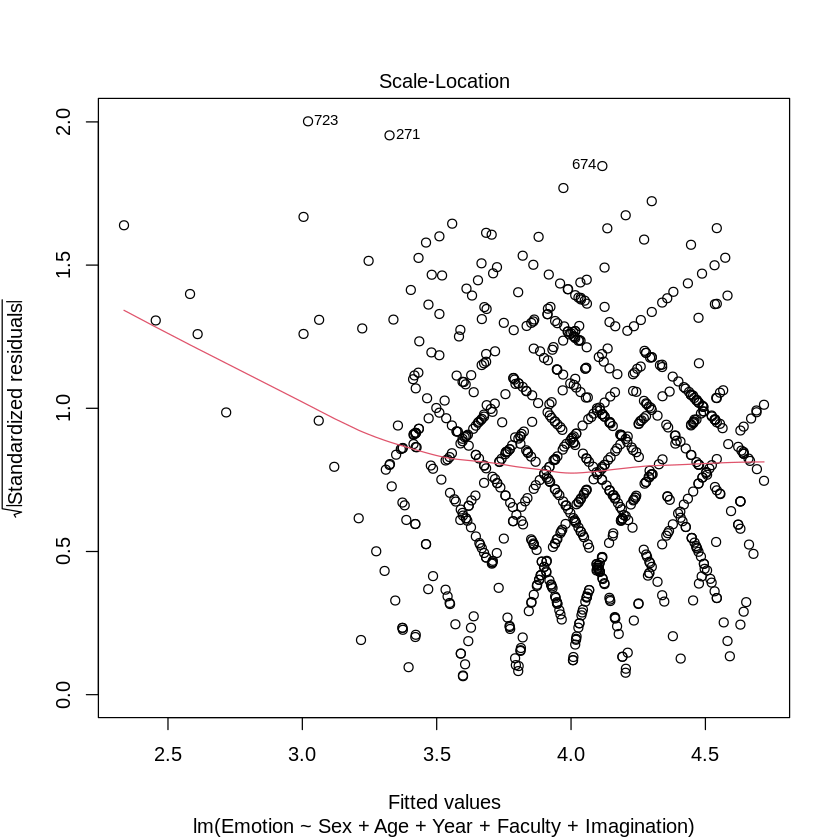

In [ ]:
plot(model0,3)

In this linear regression model, the Emotion score is significantly influenced by several factors. Participants with higher Imagination scores tend to have higher Emotion scores. Additionally, being in certain faculties, such as Faculty 5, is associated with significantly lower Emotion scores. Sex and Age also show significant associations with Emotion. The overall model has a statistically significant fit, explaining 33.43% of the variance in Emotion scores.

# Linear mixed models

There are several approaches when using multilevel analysis. We are
presenting here  for three cases:
 * Intercept-only Model,
 * random intercept and
 * random slope model.



Here we are visuaizing relation of Emotion and Imagination across different Faculties.

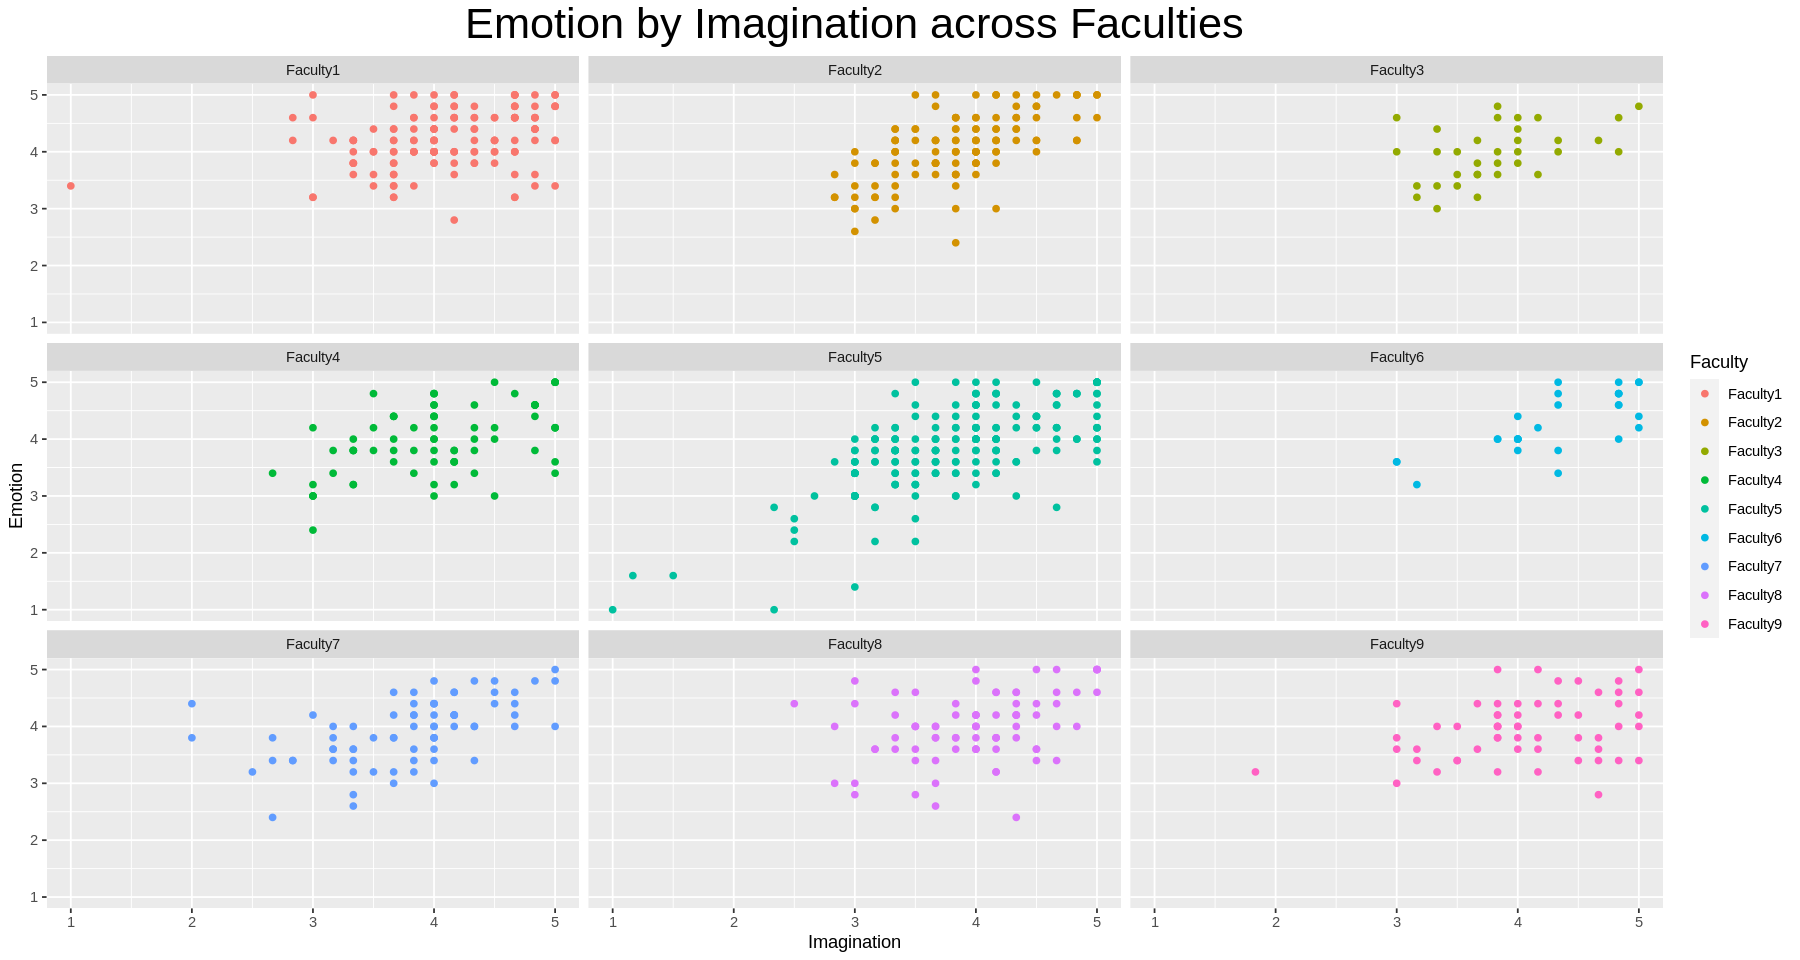

In [ ]:

# emotions by imagination across faculties
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = data, aes(x = Imagination, y = Emotion, color = Faculty)) +
  geom_point() +
  facet_wrap(~ Faculty)+ theme(plot.title = element_text(size = 26, hjust = 0.5))+
  labs(title = "Emotion by Imagination across Faculties",
       x = "Imagination",
       y = "Emotion")


### Intercept only model

In the context of linear mixed effects models, an "intercept-only model" is a model that includes only the intercept term without any fixed or random slopes. This type of model is appropriate when there is no meaningful variation in the slopes across different groups or levels of the data. It is commonly used as a baseline model for comparison with more complex models.

In [ ]:
#  intercept only model for emotion as dependent and faculty cluster variable

model1 <- lmer(Emotion ~ 1 + (1 | Faculty), data = data)
summary(model1)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Emotion ~ 1 + (1 | Faculty)
   Data: data

REML criterion at convergence: 1494.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6727 -0.6323  0.0237  0.6797  1.8869 

Random effects:
 Groups   Name        Variance Std.Dev.
 Faculty  (Intercept) 0.0145   0.1204  
 Residual             0.3718   0.6098  
Number of obs: 800, groups:  Faculty, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  4.02023    0.04698 8.47413   85.57 9.57e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

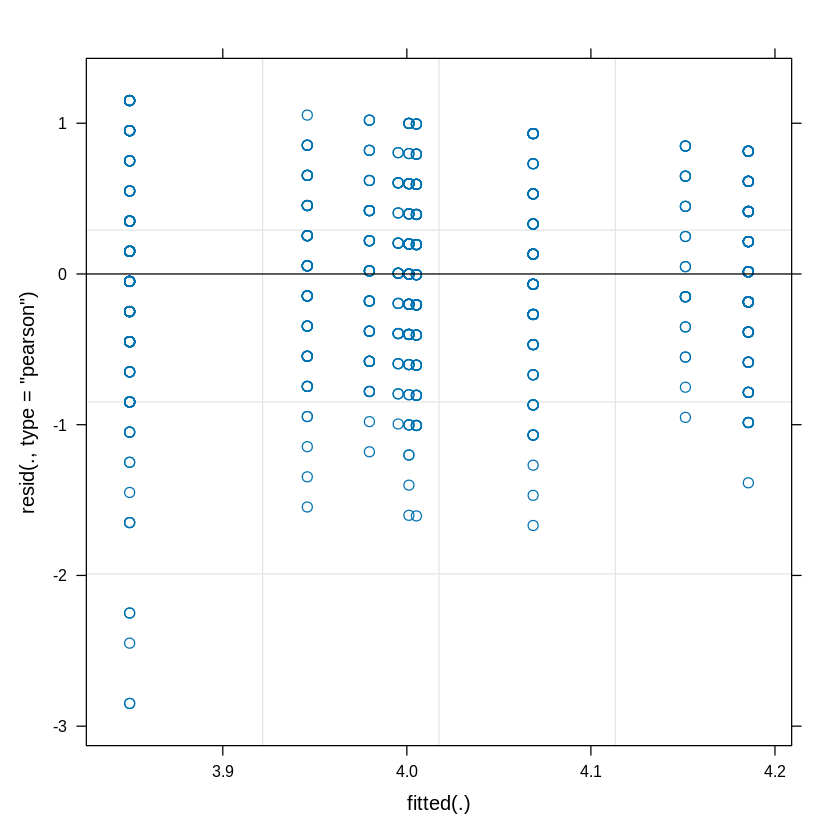

In [ ]:
plot(model1)

In this linear mixed-effects model, the intercept represents the overall Emotion score across all faculties. The estimated fixed effect for the intercept is 4.02023 (p < 0.001), indicating the average Emotion score when considering the random effect of Faculty. The random effects show that there is variability in Emotion scores across different faculties, with a standard deviation of 0.1204, suggesting that the impact of Faculty on Emotion scores varies among groups.

## Random Intercept with One Fixed Level-1 Factor (Non-Random Slope)

A random intercept model is a type of linear mixed model that includes a random intercept term to account for the correlation among observations within the same group or cluster. The random intercept allows the average outcome to vary across different groups, capturing the unobserved group-specific effects. This model is suitable for data with a hierarchical or clustered structure, where observations are nested within higher-level groups (e.g., students within schools). The random intercept model consists of a fixed part (including the intercept and possibly other fixed effects) and a random part (the random intercept). The random intercept is treated as a random variable, and its variance is estimated from the data. This model is used in various fields, including education, psychology, and public health, to analyze data with a nested structure and account for group-level variability.

The basic syntax for mixed-effects modeling for an experiment with one independent variable (Imagination) and random intercepts but no random slopes for  items(faculty) is:

In [ ]:
# create a random intercept model

model2 <- lmer(Emotion ~ 1 + Imagination + (1 | Faculty), data = data)
summary(model2)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Emotion ~ 1 + Imagination + (1 | Faculty)
   Data: data

REML criterion at convergence: 1212

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0621 -0.6395  0.0503  0.6883  2.7866 

Random effects:
 Groups   Name        Variance Std.Dev.
 Faculty  (Intercept) 0.005986 0.07737 
 Residual             0.260554 0.51045 
Number of obs: 800, groups:  Faculty, 9

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)   1.9236     0.1170 476.1156   16.44   <2e-16 ***
Imagination   0.5292     0.0284 795.1626   18.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Imagination -0.960

The portions in the interior sets of parentheses are the random effects, and the portions not in these parentheses are the fixed effects.The vertical lines within the random-effects portions of the code are called pipes, and they indicate that within each set of parentheses, the effects to the left of the pipe vary by the grouping factor to the right of the pipe.Thus, in this example, the intercept (indicated by the 1) varies by the one grouping factors in this experiment: Faculty. The model thus far includes random intercepts but no random slopes.

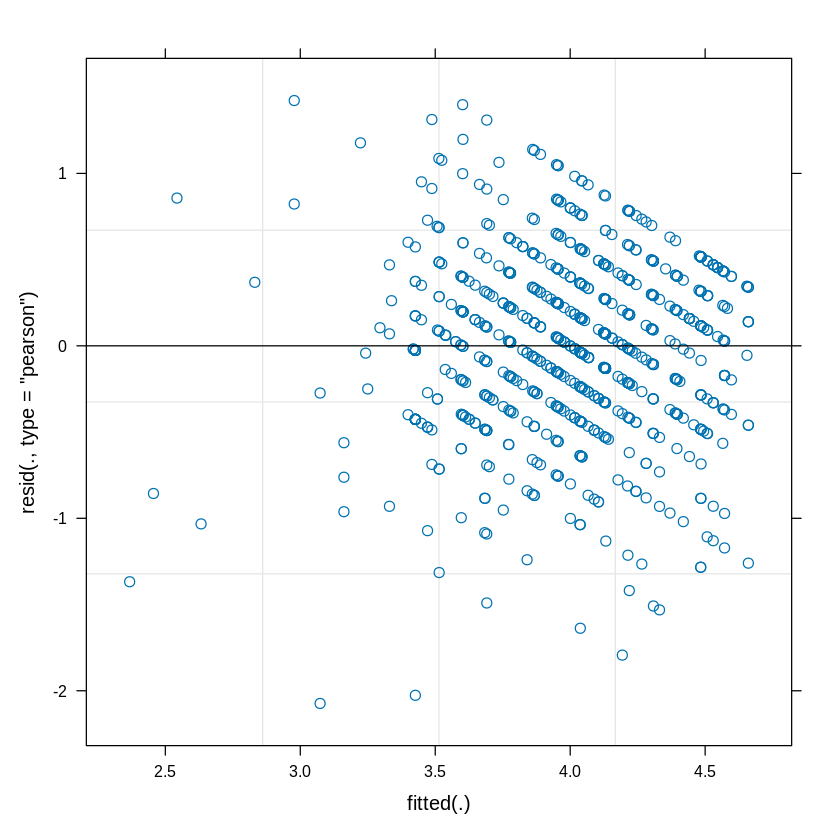

In [ ]:
plot(model2)

In this linear mixed-effects model, the Emotion scores are significantly influenced by Imagination. Participants with higher Imagination scores tend to have higher Emotion scores (estimate = 0.529, p < 0.001). The random effects indicate that there is variability in Emotion scores across different faculties, with a standard deviation of 0.0774. The high negative correlation (-0.960) between the Intercept and Imagination suggests that faculties with higher average Emotion scores tend to have a smaller positive effect of Imagination. Overall, the model with Imagination as the sole predictor provides a good fit to the data, explaining the variability in Emotion scores.

## Comparison between model1 and moedl2

In [ ]:
#  compare model 1 and model2

anova(model2,model1, refit = FALSE)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model1,3,1500.770,1514.824,-747.3852,1494.770,NA,NA,NA
model2,4,1220.016,1238.755,-606.0081,1212.016,282.7541,1,1.885518e-63


The model2 fits the data better - this is shown by the significant $\chi^2$ value. The test checks the difference between the two models in their deviance, i.e. the misfit of the models to the data.

This is evident from the considerably lower AIC (1220.016) and BIC (1238.755) values for Model 2. The likelihood ratio test (Chisq) further supports the superiority of Model 2 (p < 0.001), indicating that it provides a more parsimonious and statistically significant representation of the observed data.



## Random Intercept and Slope for One Level-1 Factor
A random slope model is a type of linear mixed model that includes a random slope term in addition to the random intercept term. In a random slope model, the relationship between the explanatory variable and the response variable can vary across different groups, allowing for individual differences in the effect of the predictor. This model is suitable for data with a hierarchical or clustered structure, where observations are nested within higher-level groups (e.g., students within schools).

In [ ]:
# create random slope model

model3 <- lmer(Emotion ~ 1 + Imagination + (1 + Imagination | Faculty), data = data)
summary(model3)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Emotion ~ 1 + Imagination + (1 + Imagination | Faculty)
   Data: data

REML criterion at convergence: 1186.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7639 -0.6049  0.0633  0.6727  2.7422 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 Faculty  (Intercept) 0.40205  0.6341        
          Imagination 0.02424  0.1557   -0.99
 Residual             0.24900  0.4990        
Number of obs: 800, groups:  Faculty, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  2.10780    0.24963 9.28437   8.444 1.18e-05 ***
Imagination  0.48530    0.06147 8.99650   7.895 2.47e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Imagination -0.991

Here, the portions in parentheses indicate that both the intercept (indicated by the 1, which in this case is optional because it is implied by the presence of random slopes but is included for clarity) and the predictor(Imagination) (indicated by + Imagination) vary by faculties.
The model above includes only one predictor, but if a model includes multiple predictors the researcher may decide which of the predictors can vary by faculties; in other words, any fixed effect to the left of the interior parentheses can be included to the left of the pipe (inside the interior parentheses), provided that including it is justified given the design of the experiment.

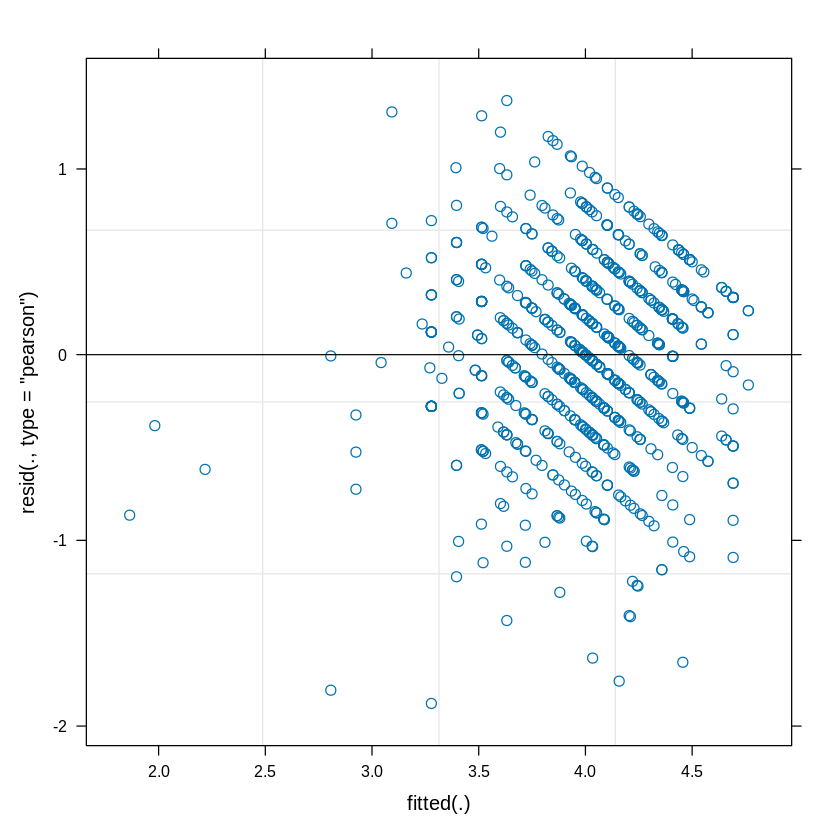

In [ ]:
plot(model3)

In this linear mixed-effects model, Emotion scores are significantly influenced by both the intercept and Imagination. The random effects for Faculty account for variability in both intercepts and Imagination slopes across different faculties. The high negative correlation (-0.991) between the intercept and Imagination suggests that faculties with higher average Emotion scores tend to have a smaller positive effect of Imagination. The model provides a good fit to the data, with the intercept representing the baseline Emotion score and Imagination contributing positively.

## Comparison between model2 and modele3

In [ ]:
# compare model2 and model3

anova(model2,model3, refit = FALSE)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model2,4,1220.016,1238.755,-606.0081,1212.016,NA,NA,NA
model3,6,1198.753,1226.861,-593.3766,1186.753,25.26307,2,3.267346e-06


The comparison of model fit between the random-intercept model (model2) and the random-slope model (model3) is assessed through an ANOVA. The significant Chi-square value (Chisq = 25.26, df = 2, p < 0.001) indicates that the random-slope model provides a significantly better fit to the data compared to the random-intercept model. This suggests that the inclusion of random slopes for certain predictors in model3 significantly improves its fit, leading us to prefer the more flexible random-slope model over the more restrictive random-intercept model.

## Random Slope for Two Level-1 Factors

In [ ]:
#
model4 <- lmer(Emotion ~ 1 + Sex +  Imagination + (1 + Sex +  Imagination | Faculty) , data = data)
summary(model4)


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00627274 (tol = 0.002, component 1)”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Emotion ~ 1 + Sex + Imagination + (1 + Sex + Imagination | Faculty)
   Data: data

REML criterion at convergence: 1186.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8094 -0.5949  0.0590  0.6612  2.7150 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr       
 Faculty  (Intercept) 0.3912273 0.62548             
          Sex2        0.0002546 0.01596   0.78      
          Imagination 0.0242942 0.15587  -0.99 -0.85
 Residual             0.2477429 0.49774             
Number of obs: 800, groups:  Faculty, 9

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   2.05185    0.24824   9.42453   8.265 1.28e-05 ***
Sex2          0.09543    0.04229 133.66334   2.257   0.0256 *  
Imagination   0.48134    0.06154   9.03813   7.822 2.59e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed

Sometimes we may find a warning message saying that the model failed to converge. Linear mixed-effects models can be computationally complex, especially when they have rich random-effects structures, and failure to converge basically means that a good fit for the data could not be found within a reasonable number of iterations of attempting to estimate model parameters. It is important never to report the results of a nonconverging model, as the convergence warnings are an indication that the model has not been reliably estimated and therefore cannot be trusted.

The first step you should take to address convergence issues is to consider our data set and how your model relates to it, and to ensure that our model has not been misspecified (e.g., have we included by-item random slopes for a predictor that does not actually vary within items?). It is also possible that the convergence warnings stem from imbalanced data:. Sometimes we may use some control parameters, depending on the source of the convergence issues, some may be more appropriate or useful than others.

In [ ]:
model4 <- lmer(Emotion ~ 1 + Sex +  Imagination + (1 + Sex +  Imagination | Faculty) ,control = lmerControl(optimizer = "bobyqa"), data = data)
summary(model4)

boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -4.5e+01”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Emotion ~ 1 + Sex + Imagination + (1 + Sex + Imagination | Faculty)
   Data: data
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1186.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8075 -0.5930  0.0574  0.6572  2.7166 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr       
 Faculty  (Intercept) 0.3954288 0.62883             
          Sex2        0.0001205 0.01098   1.00      
          Imagination 0.0244806 0.15646  -0.99 -0.99
 Residual             0.2477481 0.49774             
Number of obs: 800, groups:  Faculty, 9

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   2.05248    0.24917   9.33850   8.237 1.40e-05 ***
Sex2          0.09430    0.04209 267.13931   2.241   0.0259 *  
Imagination   0.48141    0.06171   8.95646   7.802 2.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘

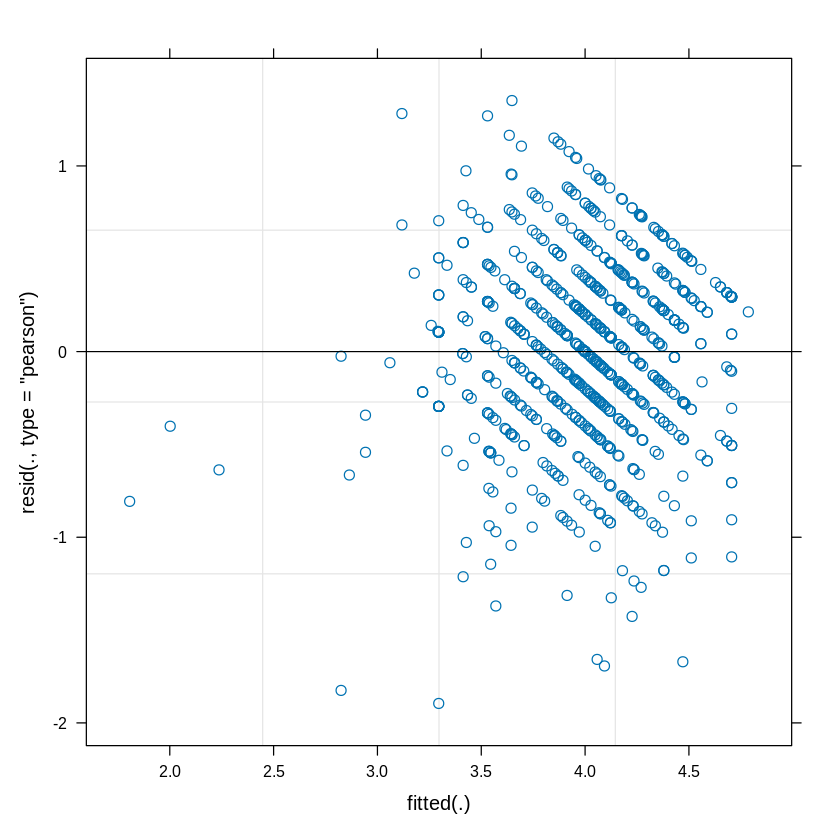

In [ ]:
plot(model4)

In this linear mixed-effects model:

Random effects for Faculty include random intercepts, slopes for Sex2, and slopes for Imagination.
Fixed effects indicate that, on average, participants with Sex2 have a slightly higher Emotion score (estimate = 0.095, p = 0.026), and each one-unit increase in Imagination is associated with an increase of approximately 0.48 units in the predicted Emotion score (p < 0.001).
The correlations among fixed effects show negligible correlation between the intercept and Sex2 but a strong negative correlation between the intercept and Imagination, indicating that faculties with higher baseline Emotion scores tend to have a smaller positive effect of Imagination.


## Comparison between model4 and modle3

In [ ]:
# compare model 4 and model 3

anova(model4,model3, refit = FALSE)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model3,6,1198.753,1226.861,-593.3766,1186.753,NA,NA,NA
model4,10,1206.301,1253.147,-593.1505,1186.301,0.4521455,4,0.9779893


The comparison of model fit between the random-intercept model (model3) and the random-slope model (model4) is assessed through an ANOVA.
Using an ANOVA reveals that the inclusion of additional predictors in Model 4 does not significantly enhance the fit to the data (Chi-sq = 0.494, df = 4, p = 0.974). Consequently, the simpler Model 3, characterized by a lower AIC and BIC, is deemed more parsimonious and is favored for its comparable explanatory power.

## Coefficients of model 3

In [ ]:
coef(model3)

$Faculty
  (Intercept) Imagination
1    2.928690   0.3063198
2    1.636278   0.6254217
3    2.232865   0.4550820
4    2.068401   0.4839859
5    1.157425   0.7069194
6    1.778652   0.5719632
7    2.154758   0.4690895
8    2.350391   0.4171483
9    2.662729   0.3317579

attr(,"class")
[1] "coef.mer"

This output indicates that the estimated intercept for the Faculty1 is 2.93, and the estimated slope is 0.30; these values are almost similar to the estimates for the fixed intercept (2.10) and slope (0.48 ms).

> We can further explore different types and combinations.